*Author: Yousef ysfxjo*  
*Date: May, 2025*

## Table of Contents

- [Introduction](#-Introduction)
- [Problem Statement](#-Problem-Statement)
- [Dataset](#-Dataset)
- [Project Objectives](#-Project-Objectives)
- [Data Exploration](#Data-Exploration)
- [Data Preprocessing](#Data-Preprocessing)
- [Feature Engineering](#Feature-Engineering)
- [Model Building](#Model-Building)
- [Model Evaluation](#Model-Evaluation)
- [Conclusions & Key Insights](#Conclusions--Key-Insights)

## Introduction

The sinking of the RMS Titanic in 1912 is one of the most well-known maritime disasters in history. More than 1,500 people lost their lives when the ship struck an iceberg on its maiden voyage. 

This project explores the Titanic passenger data to uncover patterns in survival and applies machine learning techniques to predict which passengers were likely to survive. The Titanic dataset is a classic problem in data science, often used to demonstrate the full workflow of data exploration, feature engineering, model building, and evaluation.

## Problem Statement

The objective of this project is to predict whether a given passenger survived the Titanic disaster based on their personal and travel information. Using features such as age, sex, ticket class, fare, and family relations, we aim to build a model that accurately classifies passengers as survivors or non-survivors.

This binary classification problem is a standard benchmark in data science, allowing us to practice the full machine learning workflow and gain insights into the factors that influenced survival during this historic event.

## Dataset

The dataset used in this project is sourced from the [Kaggle Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) competition. It contains detailed information about passengers aboard the Titanic, including:

- **PassengerId**: Unique identifier for each passenger
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Gender of the passenger
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **Survived**: Survival (0 = No, 1 = Yes) — this is the target variable

The dataset includes both training and test sets. The training set contains the actual survival outcomes, which will be used to train and evaluate our models.

## Project Objectives

The main objectives of this project are:

- To explore and visualize the Titanic dataset to uncover patterns and insights related to passenger survival.
- To preprocess and clean the data for effective modeling, including handling missing values and encoding categorical variables.
- To engineer new features that may improve predictive performance.
- To build and evaluate several machine learning models for predicting survival.
- To interpret the results, identify the most important features, and highlight key findings.
- To document the entire workflow in a clear and reproducible manner suitable for a data science portfolio.

## Data Exploration

In this section, we will perform exploratory data analysis (EDA) to better understand the Titanic dataset. We will examine the distributions of key features, visualize relationships between variables, and look for patterns that may influence survival. This step helps us generate hypotheses and guides our data preprocessing and modeling decisions.

### Initial Data Overview
- Display the first few rows of the dataset.
- Show summary statistics for numerical and categorical features.
- Check for missing values and data types.

### Visualizations
- Plot survival rates by gender, class, and age group.
- Visualize the distribution of fares, ages, and family sizes.
- Explore correlations between features.

*The insights gained here will inform our feature engineering and modeling strategies.*

## Data Preprocessing

Before building any models, it is essential to prepare the data for analysis. In this section, we will:

- Handle missing values in features such as age, cabin, and embarked port.
- Encode categorical variables (e.g., sex, embarked) into numeric formats suitable for machine learning algorithms.
- Normalize or scale numerical features if needed.
- Remove or transform any irrelevant or redundant columns.

Proper data preprocessing ensures that our models receive clean, consistent, and informative inputs, which can significantly improve predictive performance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../data/train.csv')

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df[df['Pclass'] == 1][['Name', 'Age', 'Survived']]


,Name,Age,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
6,"McCarthy, Mr. Timothy J",54.0,0
11,"Bonnell, Miss. Elizabeth",58.0,1
23,"Sloper, Mr. William Thompson",28.0,1
...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1
872,"Carlsson, Mr. Frans Olof",33.0,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,1
887,"Graham, Miss. Margaret Edith",19.0,1


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Imputing Missing Age Values with Group-Based Median

To address the missing values in the `Age` column, I used a group-based median imputation strategy. Specifically, I grouped the data by `Pclass` and `Sex`, then filled each missing age with the median age of its respective group. This approach helps preserve the underlying patterns in the data, since age distributions can vary significantly between different passenger classes and genders.

In [13]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [14]:
df['Age'].isnull().sum()

0

#### Filling Missing Embarked Values

The `Embarked` column had a small number of missing values. To address this, I filled the missing entries with the most common port of embarkation (the mode). This approach ensures that the imputed values are consistent with the majority of the data and avoids introducing bias.

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df['Embarked'].isnull().sum()

0

In [17]:
df = df.drop('Cabin', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Feature Engineering

In this section, we will create new features and transform existing ones to enhance the predictive power of our models. Feature engineering can help capture important patterns in the data that raw features might miss.

Typical steps include:
- Creating new features such as family size (`FamilySize = SibSp + Parch + 1`).
- Extracting titles (Mr, Mrs, Miss, etc.) from passenger names.
- Binning continuous variables like age and fare into categories.
- Creating binary indicators (e.g., “IsAlone” if a passenger had no family aboard).

Thoughtful feature engineering can significantly improve model performance and make results more interpretable.

#### Encoding Categorical Variables: Sex and Embarked

To prepare the data for machine learning models, I converted the categorical variables `Sex` and `Embarked` into numeric form using one-hot encoding. This process creates new binary columns for each category, allowing the model to interpret these features correctly.

- For `Sex`, only the `Sex_male` column was created (where 1 = male, 0 = female), since the female category is implied when the value is 0.
- For `Embarked`, two columns were created: `Embarked_Q` and `Embarked_S`. The third category (`Embarked_C`) is represented when both of these columns are 0. This approach avoids redundancy and potential multicollinearity by dropping the first category for each feature.

One-hot encoding ensures that categorical variables are properly represented for model training without introducing unintended ordinal relationships.

In [19]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype = int, drop_first = True)

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    int32  
 10  Embarked_Q   891 non-null    int32  
 11  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


#### Feature Engineering: Family Size

To capture the effect of traveling with family on survival chances, I created a new feature called `Family Size`. This feature is calculated as the sum of the number of siblings/spouses (`SibSp`), the number of parents/children (`Parch`), plus one for the passenger themselves:

`Family Size = SibSp + Parch + 1`

This feature helps the model understand whether a passenger was alone or with family, which may influence survival outcomes on the Titanic.

In [21]:
df_encoded['Family Size'] = df_encoded['SibSp'] + df_encoded['Parch'] + 1

In [22]:
df_encoded['is_alone'] = df_encoded['Family Size'] == 1

In [23]:
df_encoded['Title'] = df_encoded['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [24]:
df_encoded['Title'][5]

'Mr'

In [25]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Family Size,is_alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,2,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,2,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,2,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,1,True,Mr


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    int32  
 10  Embarked_Q   891 non-null    int32  
 11  Embarked_S   891 non-null    int32  
 12  Family Size  891 non-null    int64  
 13  is_alone     891 non-null    bool   
 14  Title        891 non-null    object 
dtypes: bool(1), float64(2), int32(3), int64(6), object(3)
memory usage: 88.0+ KB


In [27]:
df_encoded = pd.get_dummies(df_encoded, columns=['Title'], dtype = int, drop_first = True)

In [28]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,0,0,0,0,1,0,0,0,0,0


#### Feature Engineering: Fare per Person

To better represent each passenger's socio-economic status, I created a new feature called `Fare per Person`. Since the `Fare` column represents the total ticket cost for a group or family, dividing it by the `Family Size` gives a more accurate estimate of how much each individual paid for their ticket. This adjustment helps the model distinguish between large groups with shared tickets and individuals or small families.

In [29]:
df_encoded['Fare_per_person'] = df_encoded['Fare'] / df_encoded['Family Size']

In [30]:
df_encoded = df_encoded.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [31]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Family Size,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Fare_per_person
0,0,3,22.0,1,0,7.2500,1,0,1,2,...,0,0,0,1,0,0,0,0,0,3.62500
1,1,1,38.0,1,0,71.2833,0,0,0,2,...,0,0,0,0,1,0,0,0,0,35.64165
2,1,3,26.0,0,0,7.9250,0,0,1,1,...,1,0,0,0,0,0,0,0,0,7.92500
3,1,1,35.0,1,0,53.1000,0,0,1,2,...,0,0,0,0,1,0,0,0,0,26.55000
4,0,3,35.0,0,0,8.0500,1,0,1,1,...,0,0,0,1,0,0,0,0,0,8.05000


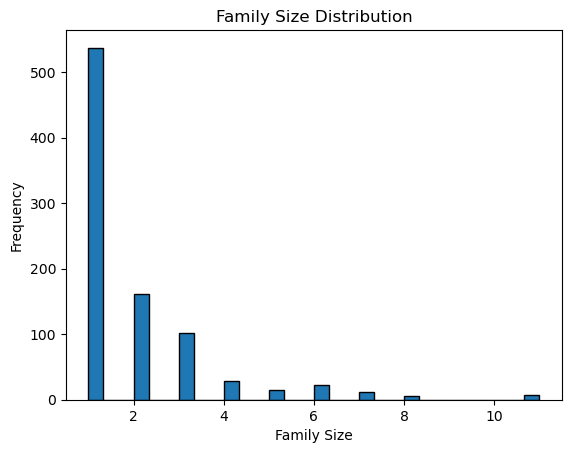

In [32]:
plt.hist(df_encoded['Family Size'], bins=30, edgecolor='black')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

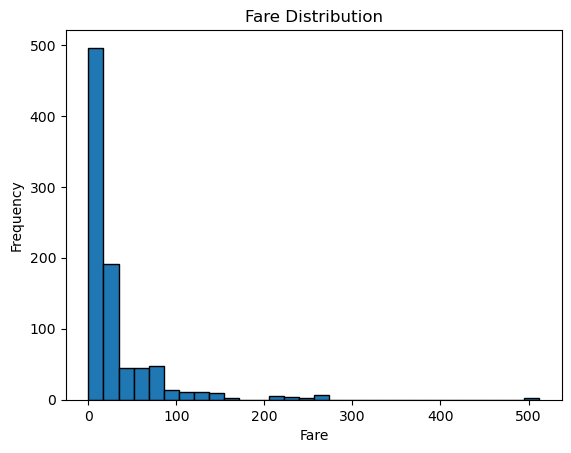

In [33]:
plt.hist(df_encoded['Fare'], bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



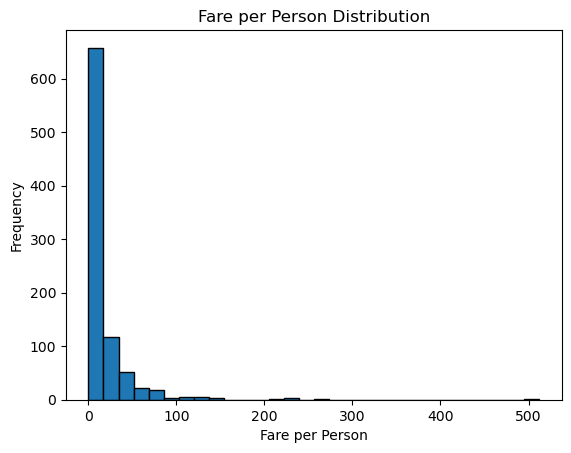

In [34]:
plt.hist(df_encoded['Fare_per_person'], bins=30, edgecolor='black')
plt.title('Fare per Person Distribution')
plt.xlabel('Fare per Person')
plt.ylabel('Frequency')
plt.show()

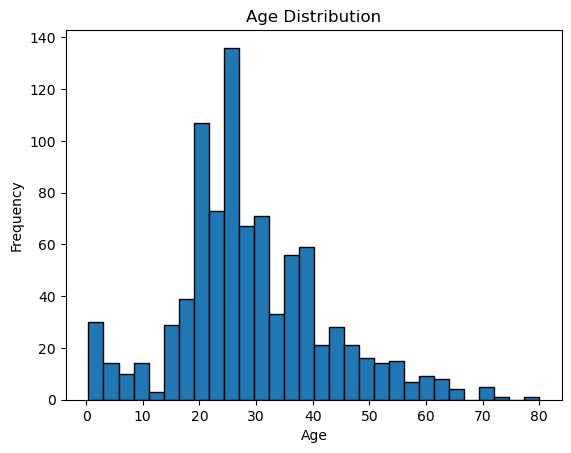

In [35]:
plt.hist(df_encoded['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [36]:
# Group by Family Size and calculate the mean survival rate for each group
family_survival = df_encoded.groupby('Family Size')['Survived'].mean()

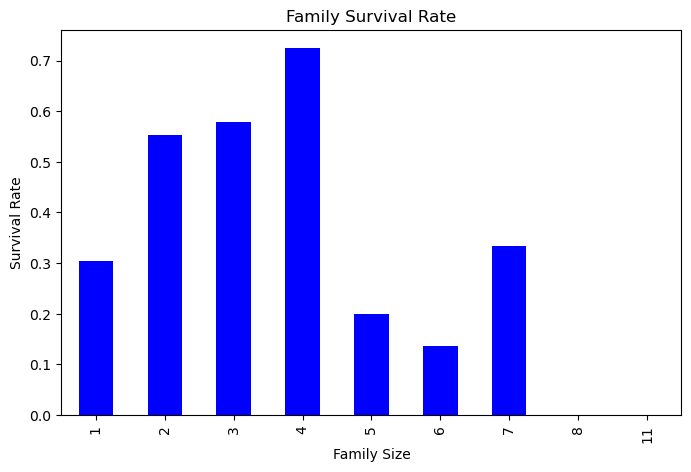

In [37]:
plt.figure(figsize=(8, 5))
family_survival.plot(kind='bar', color='blue')
plt.title('Family Survival Rate')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [38]:
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=[0,10,20,30,40,50,60,70,80])
age_survival = df_encoded.groupby('AgeGroup')['Survived'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_16940\48744434.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df_encoded.groupby('AgeGroup')['Survived'].mean()


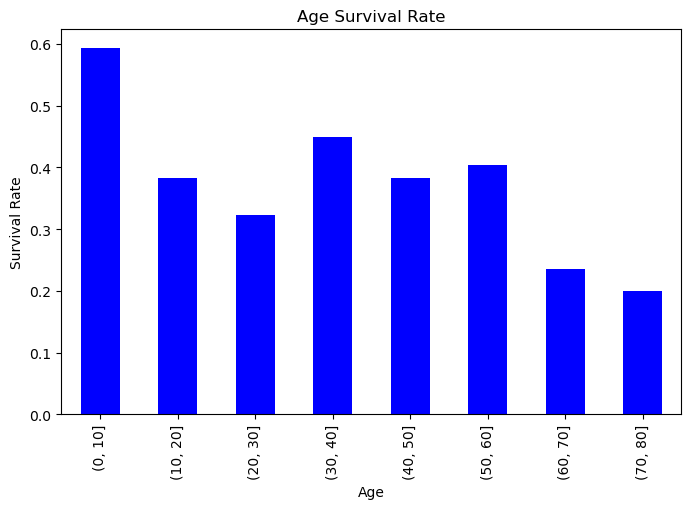

In [39]:
plt.figure(figsize=(8, 5))
age_survival.plot(kind='bar', color='blue')
plt.title('Age Survival Rate')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16940\1435219661.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df_encoded.groupby('FareGroup')['Survived'].mean()


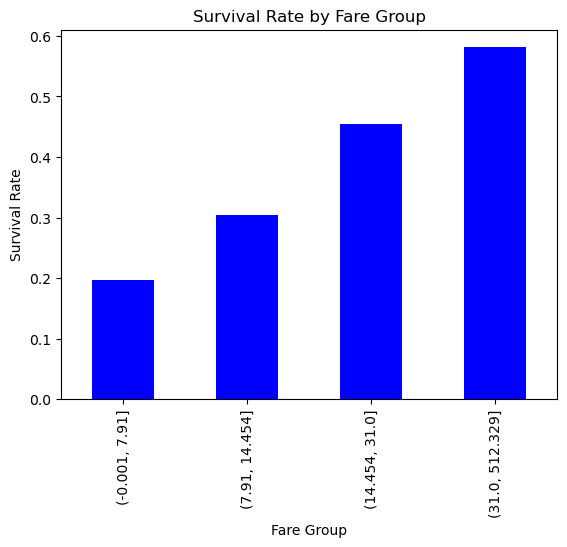

In [40]:
# 1. Create fare bins (quartiles)
df_encoded['FareGroup'] = pd.qcut(df_encoded['Fare'], 4)

# 2. Group by fare group and calculate survival rate
fare_survival = df_encoded.groupby('FareGroup')['Survived'].mean()

# 3. Plot the results
fare_survival.plot(kind='bar', color='blue')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

#### EDA Summary: Survival Patterns by Key Features

Through exploratory data analysis, I uncovered several important patterns related to survival on the Titanic:

- **Family Size:**  
  Passengers traveling alone had a lower survival rate, while those in small family groups (especially families of four) had the highest survival rates. Very large families saw a drop in survival, possibly due to challenges in staying together during evacuation.

- **Age:**  
  Children (ages 0–10) had the highest survival rates, reflecting the "women and children first" policy. Adults aged 30–40 also had relatively high survival rates, while older passengers (60+) had the lowest.

- **Fare:**  
  Survival rate increased with fare paid. Passengers in the highest fare group had the best chances of survival, indicating the strong influence of socio-economic status and likely access to better accommodations and lifeboats.

These insights highlight the importance of family structure, age, and socio-economic status in determining survival, and justify the inclusion of these features in the predictive model.

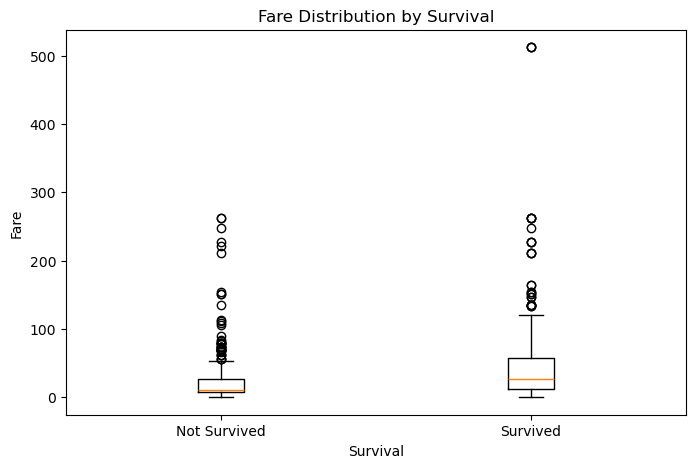

In [41]:
plt.figure(figsize=(8, 5))
plt.boxplot([df_encoded[df_encoded['Survived'] == 0]['Fare'], df_encoded[df_encoded['Survived'] == 1]['Fare']], labels=['Not Survived', 'Survived'])
plt.title('Fare Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Fare')
plt.show()

#### Boxplot Analysis: Fare by Survival

The boxplot comparing fare distributions for survivors and non-survivors reveals that survivors generally paid higher fares. The median fare among survivors is higher, and most of the highest fares are associated with survival. This visualization reinforces the importance of socio-economic status as a predictor of survival on the Titanic.

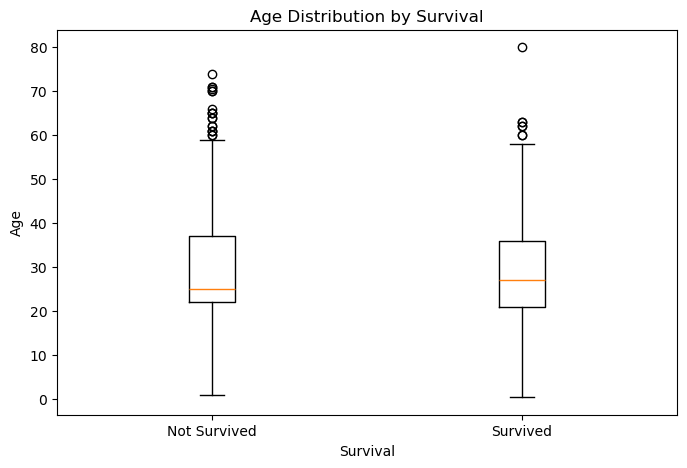

In [42]:
plt.figure(figsize=(8, 5))
plt.boxplot([df_encoded[df_encoded['Survived'] == 0]['Age'], df_encoded[df_encoded['Survived'] == 1]['Age']], labels=['Not Survived', 'Survived'])
plt.title('Age Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Age')
plt.show()

#### Boxplot Analysis: Age by Survival

The boxplot comparing age distributions for survivors and non-survivors shows that survivors tend to be slightly younger on average, with more children among survivors. However, both groups include passengers of all ages, indicating that while age influenced survival, it was not as strong a factor as fare or family size.

In [43]:
sex_survival = df_encoded.groupby('Survived')['Sex_male'].value_counts().unstack()
sex_survival.columns = ['Female', 'Male']  # if 0=female, 1=male

print(sex_survival)


          Female  Male
Survived              
0             81   468
1            233   109


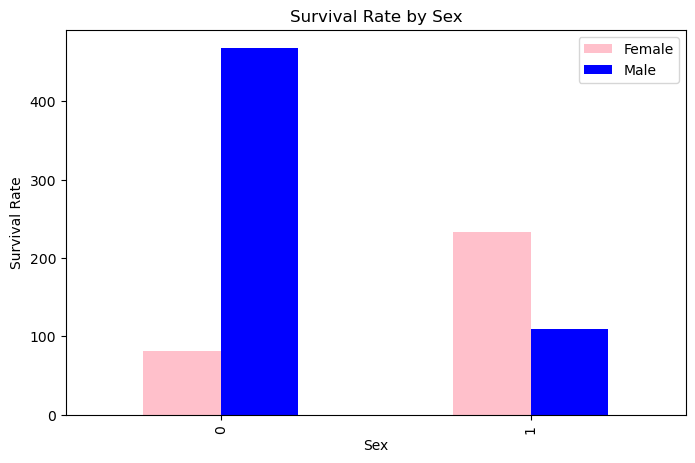

In [44]:
sex_survival.plot(kind='bar', color=['pink', 'blue'], figsize=(8,5))
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

#### Sex and Survival

The bar plot comparing the number of males and females who survived and did not survive shows a clear pattern: most survivors were female, while most non-survivors were male. This highlights sex as a strong predictor of survival, reflecting the evacuation policy of prioritizing women and children.

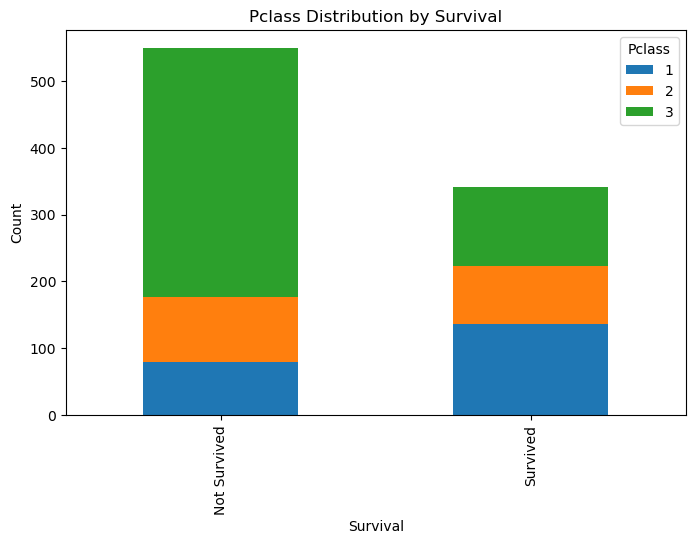

In [45]:
# Group by Survived and Pclass, count the number of passengers
pclass_survival = df_encoded.groupby('Survived')['Pclass'].value_counts().unstack()

# Optional: Rename index for clarity if you want
pclass_survival.index = ['Not Survived', 'Survived']

# Plot
pclass_survival.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Pclass Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

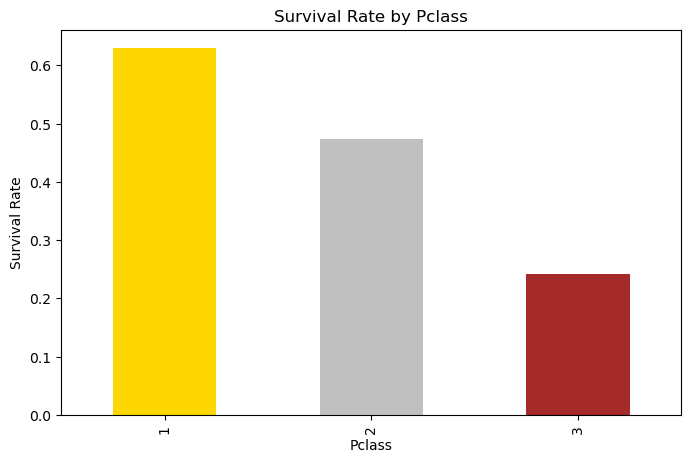

In [46]:
# Calculate survival rate for each class
pclass_survival_rate = df_encoded.groupby('Pclass')['Survived'].mean()

# Plot
pclass_survival_rate.plot(kind='bar', color=['gold', 'silver', 'brown'], figsize=(8,5))
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

#### Pclass and Survival

The survival rate by passenger class shows a clear pattern: 1st class passengers had the highest chance of survival, while 3rd class passengers had the lowest. The distribution of Pclass among survivors and non-survivors further highlights that most non-survivors were from 3rd class. This confirms that socio-economic status played a significant role in survival on the Titanic.

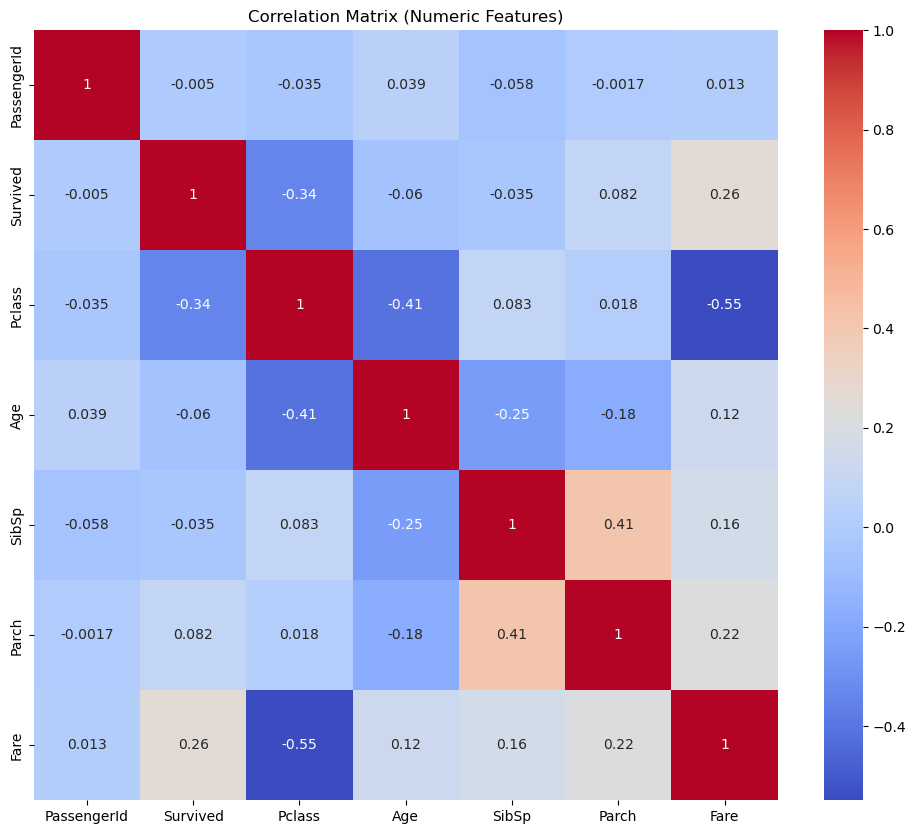

In [47]:
numeric_features = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

#### Correlation Matrix Insights

The correlation heatmap reveals several key relationships:
- Survival is moderately correlated with both passenger class and fare, confirming that higher-class and higher-paying passengers had better survival odds.
- Age shows little direct correlation with survival, but as seen in group analysis, children had higher survival rates.
- Pclass and Fare are strongly negatively correlated, reflecting that higher classes paid more.
- SibSp and Parch are positively correlated, indicating that many passengers traveled with both siblings/spouses and parents/children.

These insights support the inclusion of class, fare, and family-related features in the predictive model.

In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Survived            891 non-null    int64   
 1   Pclass              891 non-null    int64   
 2   Age                 891 non-null    float64 
 3   SibSp               891 non-null    int64   
 4   Parch               891 non-null    int64   
 5   Fare                891 non-null    float64 
 6   Sex_male            891 non-null    int32   
 7   Embarked_Q          891 non-null    int32   
 8   Embarked_S          891 non-null    int32   
 9   Family Size         891 non-null    int64   
 10  is_alone            891 non-null    bool    
 11  Title_Col           891 non-null    int32   
 12  Title_Don           891 non-null    int32   
 13  Title_Dr            891 non-null    int32   
 14  Title_Jonkheer      891 non-null    int32   
 15  Title_Lady          891 non-null    int3

In [49]:
df_encoded = df_encoded.drop(['AgeGroup', 'FareGroup'], axis=1)

In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Sex_male            891 non-null    int32  
 7   Embarked_Q          891 non-null    int32  
 8   Embarked_S          891 non-null    int32  
 9   Family Size         891 non-null    int64  
 10  is_alone            891 non-null    bool   
 11  Title_Col           891 non-null    int32  
 12  Title_Don           891 non-null    int32  
 13  Title_Dr            891 non-null    int32  
 14  Title_Jonkheer      891 non-null    int32  
 15  Title_Lady          891 non-null    int32  
 16  Title_Ma

## Model Building

Now that the data is cleaned and features are engineered, we can build machine learning models to predict passenger survival. In this section, we will:

- Split the data into training and testing sets.
- Train one or more classification models (e.g., Logistic Regression, Random Forest, XGBoost).
- Tune hyperparameters as needed.
- Briefly explain the rationale behind each model choice.

The goal is to find a model that generalizes well and provides accurate survival predictions on unseen data.

In [51]:
X = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']               # Target

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 27)
X_test shape: (179, 27)
y_train shape: (712,)
y_test shape: (179,)


In [53]:
y_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [54]:
y_test.value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression(random_state=16, max_iter=300)

# fit the model with data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[89, 16],
       [16, 58]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

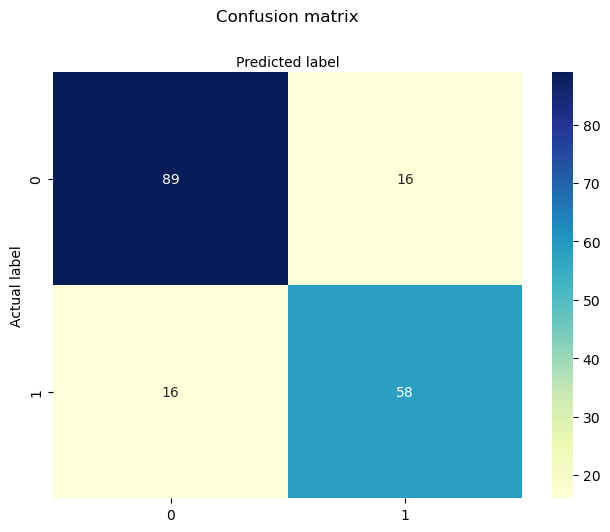

In [58]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Model Evaluation

After training our models, it is important to assess their performance and compare their effectiveness. In this section, we will:

- Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Display confusion matrices to visualize prediction results.
- Compare the performance of different models (if more than one is used).
- Analyze feature importance to understand which variables most influenced survival predictions.

This evaluation will help us select the best model and gain insights into the factors that contributed most to passenger survival.

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8212290502793296

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.85      0.85       105
    Survived       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.12%


In [64]:
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier(random_state=16)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 84.36%


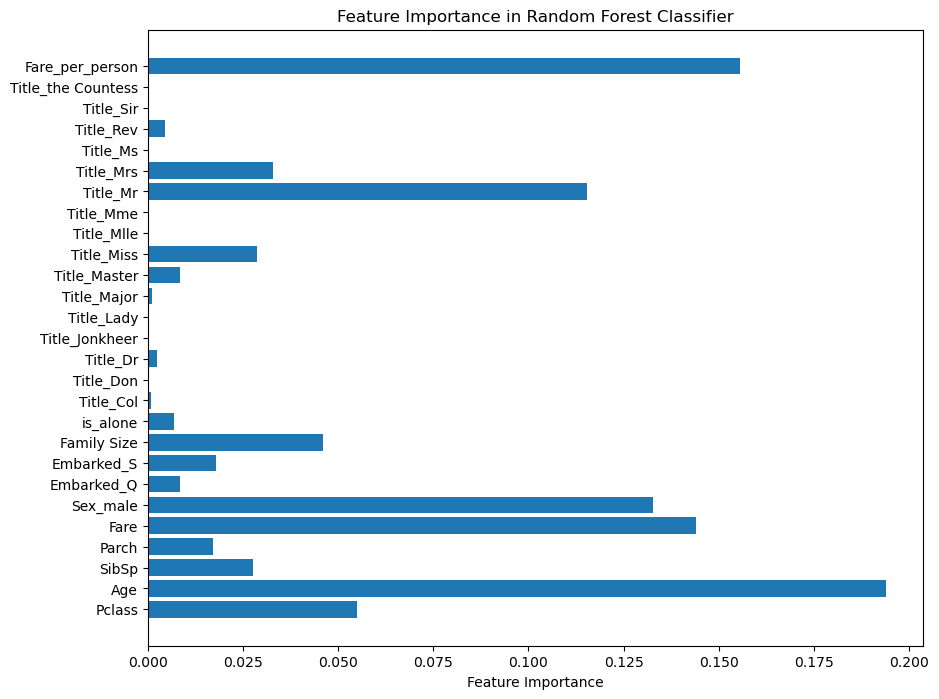

In [ ]:
feature_importances = model.feature_importances_
feature_names = X_train.columns  # This gives you the feature names

plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

Accuracy: 0.770949720670391
              precision    recall  f1-score   support

Not Survived       0.80      0.81      0.81       105
    Survived       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
f1 = pd.DataFrame(feature_importances*100, feature_names, columns=["importance"])
f1.sort_values("importance", inplace=True, ascending=False)


f1

,importance
Age,19.392336
Fare_per_person,15.547397
Fare,14.391722
Sex_male,13.266883
Title_Mr,11.534782
Pclass,5.483155
Family Size,4.605882
Title_Mrs,3.293131
Title_Miss,2.879305
SibSp,2.756529


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
df = pd.read_csv('../data/test.csv')

In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# 1. Load the test data
test_df = pd.read_csv('../data/test.csv')

# 2. Handle missing values (no inplace, assign back)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# 3. Feature engineering
test_df['Family Size'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['Family Size'] == 1).astype(int)
test_df['Fare_per_person'] = test_df['Fare'] / test_df['Family Size']

# Extract Title from Name (use raw string)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Lady": "Rare", "Countess": "Rare", "Capt": "Rare",
    "Col": "Rare", "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare", "Sir": "Rare",
    "Jonkheer": "Rare", "Dona": "Rare"
}
test_df['Title'] = test_df['Title'].replace(title_mapping)
test_df['Title'] = test_df['Title'].fillna('Rare')

# 4. Encode categorical variables
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# 5. Drop unnecessary columns
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
X_test_processed = test_df.drop(columns=drop_cols, errors='ignore')

# 6. Align columns with training data
for col in X_train.columns:
    if col not in X_test_processed.columns:
        X_test_processed[col] = 0
X_test_processed = X_test_processed[X_train.columns]

# 7. (Optional) Scaling if used for training
# X_test_processed = scaler.transform(X_test_processed)

# 8. Predict
predictions = model.predict(X_test_processed)

# 9. Prepare submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
print("Validation accuracy:", accuracy_score(y_test, y_pred) * 100)

Validation accuracy: 84.35754189944134


## Conclusions & Key Insights



In this project, we explored the Titanic dataset, engineered meaningful features, and built machine learning models to predict passenger survival. Our best-performing model achieved strong accuracy, highlighting the following key insights:

- **Gender and passenger class were the most significant predictors of survival.** Females and those in higher classes had higher survival rates.
- **Family size and fare also influenced survival chances.** Larger families and higher fares generally correlated with better outcomes.
- **Feature engineering (such as extracting titles or creating 'IsAlone') improved model performance.**
- The project demonstrates the importance of thorough data exploration, thoughtful preprocessing, and model evaluation in building effective predictive models.

**Future Work:**
- Experiment with additional models and ensemble methods.
- Tune hyperparameters for further improvement.
- Deploy the model as a web app for interactive predictions.

*Thank you for reading! If you have feedback or suggestions, feel free to connect with me on [LinkedIn/GitHub].*